In [1]:
import numpy as np
import awkward as ak
import uproot
import src.functions as fn
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pylab import cm
import networkx as nx

In [2]:
%matplotlib inline

import mplhep as hep

# Make plots look more HEP-like
plt.style.use(hep.style.ROOT)

In [3]:
filename = "../tracksters_ds_10e.root"
file = uproot.open(filename)
tracksters = file["tracksters"]
vertices_indexes = tracksters['vertices_indexes'].array()
vertices_x = tracksters['vertices_x'].array()
vertices_y = tracksters['vertices_y'].array()
vertices_z = tracksters['vertices_z'].array()
vertices_E = tracksters['vertices_energy'].array()

In [4]:
vertices_indexes_00 = vertices_indexes[0,0]
vertices_x_00 = vertices_x[0,0]
vertices_y_00 = vertices_y[0,0]
vertices_z_00 = vertices_z[0,0]
vertices_E_00 = vertices_E[0,0]

In [5]:
vertices_indexes_0 = vertices_indexes[0]
vertices_x_0 = vertices_x[0]
vertices_y_0 = vertices_y[0]
vertices_z_0 = vertices_z[0]
vertices_E_0 = vertices_E[0]

In [4]:
edges = fn.edgeBuilderNNTr(
    vertices_indexes, 
    vertices_x, 
    vertices_y, 
    vertices_z, 
    vertices_E
)


In [7]:
def plotEnergyCentrality(vertices_indexes,vertices_x,vertices_y,vertices_z,vertices_E,edges,tracksterN):
    
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111,projection='3d')
    fn.plotTrackster(fig,ax,
                     vertices_x[tracksterN], 
                     vertices_y[tracksterN], 
                     vertices_z[tracksterN],
                     vertices_E[tracksterN],
                     vertices_indexes[tracksterN],
                     ak.to_numpy(edges[tracksterN]),
                     'Vertex Energy (GeV)')

    c_pr_undir=fn.centralityPageRank(fn.adjM(vertices_indexes[tracksterN],edges[tracksterN]),0.85)
    
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111,projection='3d')
    fn.plotTrackster(fig,ax,vertices_x[tracksterN], vertices_y[tracksterN], vertices_z[tracksterN],
                     c_pr_undir,vertices_indexes[tracksterN],edges[tracksterN],'PageRank Undirected Centrality')

    c_pr_dir=fn.centralityPageRank(fn.adjM(vertices_indexes[tracksterN],edges[tracksterN]),0.85)

    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111,projection='3d')
    fn.plotTrackster(fig,ax,vertices_x[tracksterN], vertices_y[tracksterN], vertices_z[tracksterN],
                     c_pr_dir,vertices_indexes[tracksterN],edges[tracksterN],'PageRank Directed Centrality')

In [ ]:
c_pr_undir=fn.centralityPageRank(fn.adjM(vertices_indexes,ak.flatten(edges)),0.85)
c_pr_dir=fn.centralityPageRank(fn.adjM(vertices_indexes,ak.flatten(edges),True),0.85)

c_eig_undir=fn.centralityEigen(fn.adjM(vertices_indexes,ak.flatten(edges)))
c_eig_dir=fn.centralityEigen(fn.adjM(vertices_indexes,ak.flatten(edges),True))
    



In [ ]:
%matplotlib inline

plotEnergyCentrality(vertices_indexes, vertices_x, vertices_y, vertices_z, vertices_E,
                     edges,1)

In [ ]:
print(len(edges[0]))
print(edges[0])
print(edges)

In [ ]:
%matplotlib inline

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111,projection='3d')
fn.plotTrackster(fig,ax,vertices_x_00, vertices_y_00, vertices_z_00,
                 c_pr_dir,vertices_indexes_00,edges_00,'PageRank Directed Centrality')

In [7]:
def nXCentralityEigen(nodes,edges,isDirected=False):
    if(isDirected):
        G=nx.DiGraph()
    else:
        G=nx.Graph()
    G.add_edges_from(ak.to_numpy(edges))
    G.add_nodes_from(ak.to_numpy(nodes))
    centr_d = nx.eigenvector_centrality_numpy(G)
    centr_np = np.array(list(centr_d.items()))
    return centr_np[centr_np[:, 0].argsort()][:,1]

def nXCentralityKatz(nodes,edges,isDirected=False):
    if(isDirected):
        G=nx.DiGraph()
    else:
        G=nx.Graph()
    G.add_edges_from(ak.to_numpy(edges))
    G.add_nodes_from(ak.to_numpy(nodes))
    centr_d = nx.katz_centrality_numpy(G)
    centr_np = np.array(list(centr_d.items()))
    return centr_np[centr_np[:, 0].argsort()][:,1]

In [28]:
n=19
print(fn.nXCentralityKatz(vertices_indexes[n],edges[n],True))
print(fn.nXCentralityKatz(vertices_indexes[n],edges[n],False))
print(fn.nXCentralityEigen(vertices_indexes[n],edges[n],True))
print(fn.nXCentralityEigen(vertices_indexes[n],edges[n],False))
print(fn.centralityKatz(vertices_indexes[n],edges[n]))
#print(fn.centralityKatz(vertices_indexes[n],edges[n],True))
print(fn.centralityEigen(vertices_indexes[n],edges[n],True))
print(fn.centralityEigen(vertices_indexes[n],edges[n],False))
print(fn.centralityPageRank(vertices_indexes[n],edges[n],0.85,True))
print(fn.centralityPageRank(vertices_indexes[n],edges[n],0.85))

[0.26093751 0.37629798 0.26093751 0.28964063 0.26093751 0.28703126
 0.28703126 0.26093751 0.34469845 0.26093751 0.28703126 0.26093751]
[0.26595529 0.34861263 0.26595529 0.29487881 0.25974971 0.29198453
 0.28655688 0.26622312 0.35129099 0.26029248 0.29225507 0.26031953]
[-2.44804177e-14  9.99999853e-01  1.15671361e-14  2.94684445e-07
  8.68194405e-14  1.55374408e-10  1.59947500e-10  5.33462163e-14
  5.42774684e-04  8.43214387e-14 -8.00132183e-11 -4.33819647e-14]
[0.21687356 0.5198105  0.21687356 0.29051961 0.06122872 0.26258093
 0.14675523 0.22929089 0.54957282 0.10955312 0.27761529 0.1158257 ]
[0.20814485 0.51726017 0.20814485 0.2969516  0.07710839 0.26459334
 0.16829019 0.2198432  0.54841466 0.11326974 0.27821186 0.11838342]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0.21687356 0.5198105  0.21687356 0.29051961 0.06122872 0.26258093
 0.14675523 0.22929089 0.54957282 0.10955312 0.27761529 0.1158257 ]
[0.14040227 0.05972926 0.14040227 0.24936282 0.59530009 0.14040227
 0.3965298  0.24936282 0

In [21]:
n=14
c_nxkatz_dir=fn.nXCentralityKatz(vertices_indexes[n],edges[n],True)
c_nxkatz_undir=fn.nXCentralityKatz(vertices_indexes[n],edges[n],False)
c_nxeig_dir=fn.nXCentralityEigen(vertices_indexes[n],edges[n],True)
c_nxeig_undir=fn.nXCentralityEigen(vertices_indexes[n],edges[n],False)
c_katz=fn.centralityKatz(vertices_indexes[n],edges[n])
#print(fn.centralityKatz(vertices_indexes[n],edges[n],True))
c_eig_dir=fn.centralityEigen(vertices_indexes[n],edges[n],True)
c_eig_undir=fn.centralityEigen(vertices_indexes[n],edges[n],False)
c_pr_dir=fn.centralityPageRank(vertices_indexes[n],edges[n],0.85,True)
c_pr_undir=fn.centralityPageRank(vertices_indexes[n],edges[n],0.85)

In [22]:
print(fn.longestPathSource(vertices_indexes[n], edges[n], c_nxkatz_dir,True))
print(fn.longestPathSource(vertices_indexes[n], edges[n], c_nxkatz_undir))
print(fn.longestPathSource(vertices_indexes[n], edges[n], c_nxeig_dir,True))
print(fn.longestPathSource(vertices_indexes[n], edges[n], c_nxeig_undir))
print(fn.longestPathSource(vertices_indexes[n], edges[n], c_katz))
print(fn.longestPathSource(vertices_indexes[n], edges[n], c_eig_dir,True))
print(fn.longestPathSource(vertices_indexes[n], edges[n], c_eig_undir))
print(fn.longestPathSource(vertices_indexes[n], edges[n], c_pr_dir,True))
print(fn.longestPathSource(vertices_indexes[n], edges[n], c_pr_undir))

0
4
0
4
5
4
5
4
4


In [10]:

def longestPathSource(nodes,edges,centralities,isDirected=False):
    """
    Finds the longest path in the network from the max
    of the stortest path algorithm.
    """
    if(isDirected):
        G=nx.DiGraph()
    else:
        G=nx.Graph()
    G.add_edges_from(ak.to_numpy(edges))
    G.add_nodes_from(ak.to_numpy(nodes))
    
    #Highest centrality node
    i_centralityMax=np.argmax(centralities)
    source=nodes[i_centralityMax]
    #Finds the shortest path from the highest centrality to all other nodes
    pathList=nx.shortest_path_length(G,source=source)
    print(pathList)
    #Takes the max of all paths to find the longest path
    longestShortestPath=max(pathList.values())
    return longestShortestPath

In [11]:
print(longestPathSource(vertices_indexes[n], edges[n], c_nxkatz_dir,True))

{237: 0}
0


In [12]:
c_nxkatz_dir

array([0.25097622, 0.33485248, 0.25097622, 0.25097622, 0.30644197,
       0.30368123, 0.27607384, 0.25097622, 0.25097622, 0.28134435,
       0.27607384, 0.30368123, 0.25097622])

In [14]:
print(vertices_indexes[n])

[222, 237, 253, 255, 258, 270, 273, 288, 306, 310, 328, 330, 345]


In [17]:
print(ak.to_numpy(edges[n]))

[(222, 258) (253, 270) (255, 237) (258, 237) (270, 258) (273, 270)
 (288, 273) (306, 328) (310, 237) (328, 330) (330, 310) (345, 330)]


In [3]:
filename2 = "/afs/cern.ch/user/d/dmagdali/CernCentralityProject/tracksters_ds_10e.root"
file2 = uproot.open(filename2)
tracksters10e=file2['tracksters']

In [26]:
print(tracksters10e.keys())
vertices10e_Labels=tracksters10e['trackster_label'].array()
vertices10e_indexes=tracksters10e['vertices_indexes'].array()
vertices10e_x = tracksters10e['vertices_x'].array()
vertices10e_y = tracksters10e['vertices_y'].array()
vertices10e_z = tracksters10e['vertices_z'].array()
vertices10e_E = tracksters10e['vertices_energy'].array()

edges10e = fn.edgeBuilderNNTr(vertices10e_indexes, vertices10e_x, vertices10e_y, vertices10e_z, vertices10e_E)

['nvertices_x', 'vertices_x', 'nvertices_y', 'vertices_y', 'nvertices_z', 'vertices_z', 'nvertices_energy', 'vertices_energy', 'nvertices_indexes', 'vertices_indexes', 'trackster_label', 'trackster_event']


In [5]:
tooSmall = ak.num(vertices10e_indexes,axis=-1) > 2
print(ak.sum(tooSmall))
print(len(vertices10e_indexes))

2358
2441


In [6]:
vertices10e_indexes_g = vertices10e_indexes[tooSmall]
vertices10e_x_g = vertices10e_x[tooSmall]
vertices10e_y_g = vertices10e_y[tooSmall]
vertices10e_z_g = vertices10e_z[tooSmall]
vertices10e_E_g = vertices10e_E[tooSmall]
print(len(vertices10e_indexes_g))

2358


In [19]:
longestComPaths=[]
longestInComPaths=[]

N_tr = len(vertices10e_indexes_g)
#N_tr=1000

for i in range(N_tr):
    v_ind=vertices10e_indexes_g[i]
    v_x=vertices10e_x_g[i] 
    v_y=vertices10e_y_g[i]
    v_z=vertices10e_z_g[i]
    v_E=vertices10e_E_g[i] 
    edges_1 = fn.edgeBuilderNew(
        v_ind,
        v_x, 
        v_y, 
        v_z, 
        v_E
    )
    edges_1 = ak.flatten(edges_1[ak.num(edges_1) > 0].to_list())

    #c_nxkatz_dir=fn.nXCentralityKatz(v_ind,edges_1,True)
    #c_nxkatz_undir=fn.nXCentralityKatz(v_ind,edges_1,False)
    c_nxeig_undir=fn.nXCentralityEigen(v_ind,edges_1,False)
    #c_katz=fn.centralityKatz(v_ind,edges_1,False)
    #c_eig_undir=fn.centralityEigen(v_ind,edges_1,False)
    #c_pr_dir=fn.centralityPageRank(v_ind,edges_1,0.85,True)
    #c_pr_undir=fn.centralityPageRank(v_ind,edges_1,0.85,False)
    longestComCentralitiesPaths=[]
    longestInComCentralitiesPaths=[]
    
    #cList=[c_nxkatz_dir,c_nxkatz_undir,c_nxeig_undir,c_katz,c_eig_undir,c_pr_dir,c_pr_undir]
    cList=[c_nxeig_undir]
    for j in cList:
        longestPath=fn.longestPathSource(v_ind,edges_1,j)
        if(vertices10e_Labels[i]==1):
            longestComCentralitiesPaths.append(longestPath)
        else:
            longestInComCentralitiesPaths.append(longestPath)
    if(vertices10e_Labels[i]==1):
        longestComPaths.append(longestComCentralitiesPaths)
    else:
        longestInComPaths.append(longestInComCentralitiesPaths)



In [20]:
longestComPaths=np.asarray(longestComPaths)
longestInComPaths=np.asarray(longestInComPaths)

In [23]:
print(len(longestComPaths))

1625


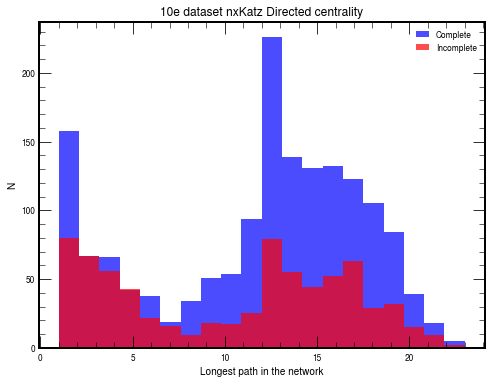

In [22]:
%matplotlib inline

plt.figure(figsize=(8,6))
n, bins, patches = plt.hist(longestComPaths, bins=20, color='b', alpha=0.7,label='Complete')
plt.hist(longestInComPaths, bins=20, color='r', alpha=0.7,label='Incomplete')
plt.legend()
plt.ylabel("N")
plt.xlabel("Longest path in the network")
plt.title("10e dataset nxKatz Directed centrality")
plt.show()

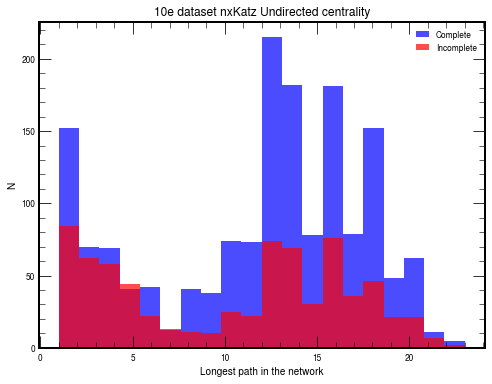

In [12]:
%matplotlib inline

plt.figure(figsize=(8,6))
n, bins, patches = plt.hist(longestComPaths[:,1], bins=20, color='b', alpha=0.7,label='Complete')
plt.hist(longestInComPaths[:,1], bins=20, color='r', alpha=0.7,label='Incomplete')
plt.legend()
plt.ylabel("N")
plt.xlabel("Longest path in the network")
plt.title("10e dataset nxKatz Undirected centrality")
plt.show()

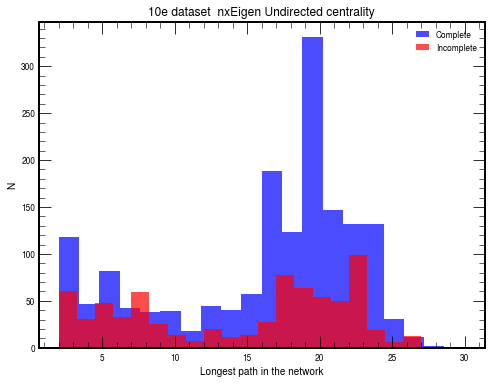

In [13]:
%matplotlib inline

plt.figure(figsize=(8,6))
n, bins, patches = plt.hist(longestComPaths[:,2], bins=20, color='b', alpha=0.7,label='Complete')
plt.hist(longestInComPaths[:,2], bins=20, color='r', alpha=0.7,label='Incomplete')
plt.legend()
plt.ylabel("N")
plt.xlabel("Longest path in the network")
plt.title("10e dataset  nxEigen Undirected centrality")
plt.show()

In [ ]:
%matplotlib inline

plt.figure(figsize=(8,6))
n, bins, patches = plt.hist(longestComPaths[:,5], bins=20, color='b', alpha=0.7,label='Complete')
plt.hist(longestInComPaths[:,5], bins=20, color='r', alpha=0.7,label='Incomplete')
plt.legend()
plt.ylabel("N")
plt.xlabel("Longest path in the network")
plt.title("10e dataset PageRank Directed centrality")
plt.show()

In [ ]:
%matplotlib inline

plt.figure(figsize=(8,6))
n, bins, patches = plt.hist(longestComPaths[:,6], bins=20, color='b', alpha=0.7,label='Complete')
plt.hist(longestInComPaths[:,6], bins=20, color='r', alpha=0.7,label='Incomplete')
plt.legend()
plt.ylabel("N")
plt.xlabel("Longest path in the network")
plt.title("10e dataset PageRank Undirected centrality")
plt.show()

In [ ]:
%matplotlib inline

plt.figure(figsize=(8,6))
n, bins, patches = plt.hist(longestComPaths[:,3], bins=20, color='b', alpha=0.7,label='Complete')
plt.hist(longestInComPaths[:,3], bins=20, color='r', alpha=0.7,label='Incomplete')
plt.legend()
plt.ylabel("N")
plt.xlabel("Longest path in the network")
plt.title("10e dataset Katz Undirected centrality")
plt.show()

In [ ]:
%matplotlib inline

plt.figure(figsize=(8,6))
n, bins, patches = plt.hist(longestComPaths[:,4], bins=20, color='b', alpha=0.7,label='Complete')
plt.hist(longestInComPaths[:,4], bins=20, color='r', alpha=0.7,label='Incomplete')
plt.legend()
plt.ylabel("N")
plt.xlabel("Longest path in the network")
plt.title("10e dataset Eigen Undirected centrality")
plt.show()

In [40]:
longestComPaths

array([[15, 14, 14, ..., 14, 20, 14],
       [15, 15, 15, ..., 15, 19, 15],
       [20, 20, 18, ..., 18, 22, 18],
       ...,
       [16, 16, 16, ..., 16, 17, 16],
       [12, 12, 12, ..., 12, 16, 12],
       [13, 15, 16, ..., 15, 21, 15]])

In [41]:
print(longestComPaths[:,0])

[15 15 20 ... 16 12 13]


In [27]:
longestComPaths=[]
longestInComPaths=[]

for i in range(len(vertices10e_indexes)):
    centralities=fn.centralityEigen(vertices10e_indexes[i],edges10e[i])
    longestPath=fn.longestPathSource(vertices10e_indexes[i],edges10e[i],centralities)
    if(vertices10e_Labels[i]==1):
        longestComPaths.append(longestPath)
    else:
        longestInComPaths.append(longestPath)



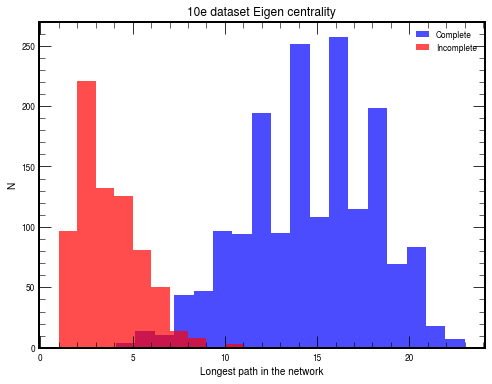

In [28]:
%matplotlib inline
plt.figure(figsize=(8,6))
n, bins, patches = plt.hist(longestComPaths, bins=20, color='b', alpha=0.7,label='Complete')
plt.hist(longestInComPaths, bins=10, color='r', alpha=0.7,label='Incomplete')
plt.legend()
plt.ylabel("N")
plt.xlabel("Longest path in the network")
plt.title("10e dataset Eigen centrality")
plt.show()